# Filter Data from INKAR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mapclassify

```
Erstveröffentlichung der INKAR-Aktualisierung am 28.01.2022.
Vorliegender korrigierter Datenstand Mai 2022.

Die INKAR-Daten liegen zeitreihenbereinigt auf dem Gebietsstand 31.12.2019 vor.
Im Themenbereich Europa wird die NUTS-Klassifikation 2016 genutzt.
Weiterführende Informationen (z.B. eine Erläuterung der Raumabgrenzungen) finden Sie unter www.Raumbeobachtung.de.

Datensatzbeschreibung
Feldseperator: ;
Dezimalzeichen: ,
Missing:
Spaltenüberschriften: Ja

Aufgrund der Größe (entpackt ~2GB) kann es beim Öffnen der CSV-Datei mit Excel oder dem Texteditor Probleme geben.
Vorgesehen ist die Nutzung dieser Gesamtdatei über Programmiersprachen wie bspw. R oder Python.

Für INKAR existiert ein inoffizielles nutzererstelltes R-Paket namens "bonn" (https://github.com/sumtxt/bonn).
```

In [2]:
inkar = pd.read_csv("../../_data/inkar_2021/inkar_2021.csv",sep=";",decimal=",",dtype={'Kennziffer':str,'Kennziffer_EU':str,'Name':str}, low_memory=False)
inkar.head()

,Bereich,ID,Indikator,Raumbezug,Kennziffer,Kennziffer_EU,Name,Zeitbezug,Wert
0,Absolutzahlen,1,Arbeitslose,Bund,1,NaN,Bundesrepublik Deutschland,1995,3632966.0
1,Absolutzahlen,1,Arbeitslose,Bund,1,NaN,Bundesrepublik Deutschland,1996,3980747.0
2,Absolutzahlen,1,Arbeitslose,Bund,1,NaN,Bundesrepublik Deutschland,1997,4384102.0
3,Absolutzahlen,1,Arbeitslose,Bund,1,NaN,Bundesrepublik Deutschland,1998,4280039.0
4,Absolutzahlen,1,Arbeitslose,Bund,1,NaN,Bundesrepublik Deutschland,1999,4100377.0


In [3]:
inkar['Jahresnummer']=inkar[inkar['Zeitbezug'].str.isnumeric()].Zeitbezug.astype(np.int32)#, errors="ignore")
#inkar[~inkar['Jahresnummer'].str.isnumeric()]['Jahresnummer'] = np.NaN
#inkar['Jahresnummer']=inkar.Jahresnummer.astype(np.int32)
inkar.dtypes

Bereich           object
ID                 int64
Indikator         object
Raumbezug         object
Kennziffer        object
Kennziffer_EU     object
Name              object
Zeitbezug         object
Wert             float64
Jahresnummer     float64
dtype: object

In [4]:
inkar.Bereich.unique()

array(['Absolutzahlen', 'Arbeitslosigkeit', 'Bauen und Wohnen',
       'Beschäftigung und Erwerbstätigkeit', 'Bevölkerung', 'Bildung',
       'Privateinkommen, Private Schulden', 'Flächennutzung und Umwelt',
       'Medizinische und soziale Versorgung', 'Öffentliche Finanzen',
       'Raumwirksame Mittel', 'Siedlungsstruktur', 'Sozialleistungen',
       'Verkehr und Erreichbarkeit', 'Wirtschaft', 'ZOM', 'SDG', 'Europa'],
      dtype=object)

In [5]:
inkar.Raumbezug.unique()

array(['Bund', 'West-Ost', 'Bundesländer', 'Kreise', 'Regierungsbezirke',
       'Kreisregionen', 'Raumordnungsregionen', 'Arbeitsmarktregionen',
       'Braunkohlerevier', 'Siedlungsstruktureller Regionstyp',
       'Siedlungsstruktureller Regionstyp (Bundesländer)',
       'Siedlungsstruktureller Regionstyp (West-Ost))',
       'Siedlungsstrukturelle Kreistyp',
       'Siedlungsstruktureller Kreistyp (Bundesländer)',
       'Siedlungsstruktureller Kreistyp (West-Ost)',
       'Städtischer-Ländlicher Raum',
       'Städtischer-Ländlicher Raum (Bundesländer)',
       'Städtischer-Ländlicher Raum (West-Ost)',
       'Raumtyp Bezug Lage (Kreise)', 'Wachsen-Schrumpfen (Kreise)',
       'Gemeindeverbände', 'BBSR-Mittelbereiche', 'Großstadtregionen',
       'Großstadtregionaler Einzugsbereich', 'IHK-Bezirke',
       'Stadt- und Gemeindetyp', 'Stadt- und Gemeindetyp (West-Ost)',
       'Stadt und Gemeindetyp (Bundesländer)',
       'Stadt- und Gemeindetyp differenziert',
       'Raumtyp Bezu

In [6]:
inkar.Indikator.unique()

array(['Arbeitslose',
       'sozialversicherungspflichtig Beschäftigte am Arbeitsort',
       'sozialversicherungspflichtig Beschäftigte am Wohnort',
       'Bevölkerung gesamt', 'Bevölkerung männlich',
       'Bevölkerung weiblich',
       'Erwerbsfähige Bevölkerung (15 bis unter 65 Jahre)',
       'Bevölkerung (mit Korrektur VZ 1987/Zensus 2011)',
       'Bodenfläche gesamt', 'Bruttoinlandsprodukt in 1000 Euro',
       'Arbeitslosenquote', 'Arbeitslosenquote Frauen',
       'Arbeitslose Frauen', 'Arbeitslosenquote Männer',
       'Arbeitslose Männer', 'ausländische Arbeitslose',
       'ausländische weibliche Arbeitslose',
       'ausländische männliche Arbeitslose',
       'Arbeitslose ohne Ausbildung',
       'Arbeitslose mit Anforderungsniveau Experte',
       'Arbeitslose mit Anforderungsniveau Spezialist',
       'Arbeitslose mit Anforderungsniveau Fachkraft',
       'Arbeitslose mit Anforderungsniveau Helfer',
       'Offene Stellen mit Anforderungsniveau Experte',
       'Off

In [7]:
# 11 min
def hasMatch(needle:str, haystack=[]):
    found = False
    for straw in haystack:
       found =  needle.startswith(straw)
       if (found):
            return found
    return found


def selectRegion(r, kennziffern=[], strict=True):
    selected = False
    if (strict):
        selected = np.isin(element=r, test_elements=kennziffern)
    else:
        selected = hasMatch(str(r), kennziffern)
    return selected

# /11min

kennziffern = ['3402','3403','3405','3451','3452','3453','3454','3455','3456','3457','3458','3460','3461','3462']
# findet nur angegebene Kennziffern
patternStrict = '^' + '$|^'.join(kennziffern)+ '$'
# findet z.B. auch Gemeinden, dh mit Kennziffern beginnende Muster
patternMatch = '.*|'.join(kennziffern) + '.*'

inkar['selected'] = inkar['Kennziffer'].str.match(patternStrict) # is already loose match
print(inkar[inkar.selected==True].count(), "selected")
region = inkar[inkar.selected==True]# inkar[np.isin(element=inkar['Kennziffer'], test_elements=kennziffern)]
#region

Bereich          83248
ID               83248
Indikator        83248
Raumbezug        83248
Kennziffer       83248
Kennziffer_EU        0
Name             83248
Zeitbezug        83248
Wert             83248
Jahresnummer     83038
selected         83248
dtype: int64 selected


[ 4.78792896 17.10595815 41.74201653 54.06004572 69.61      ] [  0  39 224  38  15]
['( -inf,  4.79]', '( 4.79, 17.11]', '(17.11, 41.74]', '(41.74, 54.06]', '(54.06, 69.61]']


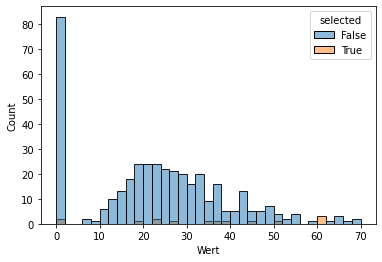

In [8]:
# Raumtyp nach Lage (nicht auf Kreisen)
kategorie_indikator = "Erreichbarkeit von Oberzentren"
kategorie = inkar[(inkar.Indikator==kategorie_indikator)&(inkar.Raumbezug=='Kreise')]
if (len(kategorie.Zeitbezug.unique())>1): print("ACHTUNG! ZEITBEZUG FILTERN!")
sns.histplot(data = kategorie, x="Wert", hue="selected", binwidth=2)
kategorie = kategorie[['Kennziffer','Wert']]
classification = mapclassify.StdMean(kategorie[kategorie['Wert']>0]['Wert'])
#classification = mapclassify.FisherJenks(kategorie['Wert'])
#classification = mapclassify.Percentiles(kategorie['Wert'], pct=[33,66,100])
print(classification.bins, classification.counts)#, classification.get_legend_classes())
print(classification.get_legend_classes())
kategorie['Klasse'] = kategorie['Wert'].apply(classification.find_bin)
kategorie['Klasse'] = kategorie['Klasse'].astype(int)

inkar = inkar.merge(right=kategorie, left_on="Kennziffer", right_on="Kennziffer", suffixes=(None,"_kat")).rename(
    columns={'Wert_kat':kategorie_indikator,'Klasse_kat':'Klasse'}
    )

#inkar[kategorie_indikator]=kategorie.Wert

#[-9.33803959  6.92447148 39.44949361 55.71200467 69.61      ] [  0  85 256  49  11]
#['( -inf, -9.34]', '(-9.34,  6.92]', '( 6.92, 39.45]', '(39.45, 55.71]', '(55.71, 69.61]']


<AxesSubplot:xlabel='Wert', ylabel='Count'>

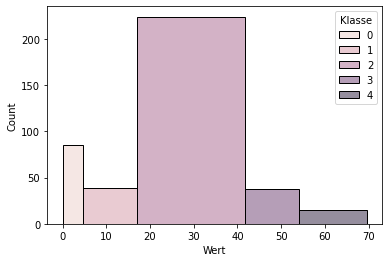

In [10]:
bins = [0]
bins.extend(classification.bins)
sns.histplot(data = kategorie, x="Wert", bins=bins, hue="Klasse") #binwidth=2, hue="Klasse",

In [11]:
import geopandas as gp
vg250_kreise = gp.read_file('../../_data/dlm/vg250-ew_12-31.utm32s.shape.ebenen_2019/vg250-ew_ebenen_1231/VG250_KRS.shp')
vg250_kreise['AGSK'] = vg250_kreise['AGS'].astype(int).astype(str)
vg250_kreise.head(1)#.plot()


,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,AGS_0,WSK,EWZ,KFL,DEBKG_ID,RS,SDV_RS,RS_0,geometry,AGSK
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,01001000,2008-01-01,90164,53.02,DEBKGDL20000002R,01001,010010000000,010010000000,"POLYGON ((526513.753 6075133.412, 526547.941 6...",1001


In [54]:
indikatoren = [
    #'Arbeitslosenquote','Zuzugsrate','Fortzugsrate',
    #'Schulabgänger ohne Abschluss',
    'Einwohnerdichte',
    'Krankenhausversorgung',
    #'SGB II - Quote', 
    'Empfänger von Grundsicherung im Alter (Altersarmut)',
    'Bruttoinlandsprodukt in 1000 Euro', 
    #'Bruttoinlandsprodukt je Erwerbstätigen',
    'Bruttoinlandsprodukt je Einwohner',
    #'Bruttoinlandsprodukt je Einwohner in Kaufkraftstandards (KKS)',
    'Säuglingssterblichkeit (<1 Jahr)',
    'Restlebenserwartung der 60-Jährigen',
    ]
ind = inkar[np.isin(element=inkar['Indikator'], test_elements=indikatoren)]
ind

,Bereich,ID,Indikator,Raumbezug,Kennziffer,Kennziffer_EU,Name,Zeitbezug,Wert,Jahresnummer,selected,Erreichbarkeit von Oberzentren,Klasse
422,Absolutzahlen,10,Bruttoinlandsprodukt in 1000 Euro,Kreise,1001,NaN,"Flensburg, Stadt",2000,2487282.00,2000.0,False,0.00,0
423,Absolutzahlen,10,Bruttoinlandsprodukt in 1000 Euro,Kreise,1001,NaN,"Flensburg, Stadt",2001,2465393.00,2001.0,False,0.00,0
424,Absolutzahlen,10,Bruttoinlandsprodukt in 1000 Euro,Kreise,1001,NaN,"Flensburg, Stadt",2002,2635779.00,2002.0,False,0.00,0
425,Absolutzahlen,10,Bruttoinlandsprodukt in 1000 Euro,Kreise,1001,NaN,"Flensburg, Stadt",2003,2705233.00,2003.0,False,0.00,0
426,Absolutzahlen,10,Bruttoinlandsprodukt in 1000 Euro,Kreise,1001,NaN,"Flensburg, Stadt",2004,2867823.00,2004.0,False,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391385,SDG,398,Bruttoinlandsprodukt je Einwohner,Kreise,16077,NaN,Altenburger Land,2015,19.96,2015.0,False,31.49,2
2391386,SDG,398,Bruttoinlandsprodukt je Einwohner,Kreise,16077,NaN,Altenburger Land,2016,20.96,2016.0,False,31.49,2
2391387,SDG,398,Bruttoinlandsprodukt je Einwohner,Kreise,16077,NaN,Altenburger Land,2017,21.77,2017.0,False,31.49,2
2391388,SDG,398,Bruttoinlandsprodukt je Einwohner,Kreise,16077,NaN,Altenburger Land,2018,22.16,2018.0,False,31.49,2


In [55]:
def group(row, groupValue=5):
    if (row['selected'] == True):
        if (row[kategorie_indikator] < groupValue):
            return "EDR Oberzentrum"
        else:
            return "EDR Rest"
    if (row.selected == False):
        if (row[kategorie_indikator] < groupValue):
            return "DE Oberzentrum"
        else:
            return "DE Rest"


def EDR(row):
    if (row['selected'] == True):
        return "EDR"
    if (row.selected == False):
        return "DE"

kategorie_grenzwert = classification.bins[0]
ind['group'] = ind.apply(group, groupValue=kategorie_grenzwert, axis=1)
ind['EDR'] = ind.apply(EDR, axis=1)


C:\Users\sSpecht\AppData\Local\Temp/ipykernel_23224/1109212959.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['group'] = ind.apply(group, groupValue=kategorie_grenzwert, axis=1)
C:\Users\sSpecht\AppData\Local\Temp/ipykernel_23224/1109212959.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['EDR'] = ind.apply(EDR, axis=1)


In [63]:
vg250_kreise.merge(right=ind, left_on="AGSK", right_on="Kennziffer")

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,Kennziffer_EU,Name,Zeitbezug,Wert,Jahresnummer,selected,Erreichbarkeit von Oberzentren,Klasse,group,EDR
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,NaN,"Flensburg, Stadt",2000,2487282.00,2000.0,False,0.00,0,DE Oberzentrum,DE
1,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,NaN,"Flensburg, Stadt",2001,2465393.00,2001.0,False,0.00,0,DE Oberzentrum,DE
2,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,NaN,"Flensburg, Stadt",2002,2635779.00,2002.0,False,0.00,0,DE Oberzentrum,DE
3,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,NaN,"Flensburg, Stadt",2003,2705233.00,2003.0,False,0.00,0,DE Oberzentrum,DE
4,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,NaN,"Flensburg, Stadt",2004,2867823.00,2004.0,False,0.00,0,DE Oberzentrum,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67216,4,4,1,16077,16077,160770001001,Altenburger Land,Landkreis,43,--,...,NaN,Altenburger Land,2015,19.96,2015.0,False,31.49,2,DE Rest,DE
67217,4,4,1,16077,16077,160770001001,Altenburger Land,Landkreis,43,--,...,NaN,Altenburger Land,2016,20.96,2016.0,False,31.49,2,DE Rest,DE
67218,4,4,1,16077,16077,160770001001,Altenburger Land,Landkreis,43,--,...,NaN,Altenburger Land,2017,21.77,2017.0,False,31.49,2,DE Rest,DE
67219,4,4,1,16077,16077,160770001001,Altenburger Land,Landkreis,43,--,...,NaN,Altenburger Land,2018,22.16,2018.0,False,31.49,2,DE Rest,DE


In [67]:
# Excel-Export eines einzelnen Indikators
ind_filter = 'Restlebenserwartung der 60-Jährigen'
ind_export = ind[(ind.Indikator==ind_filter)&(ind.Jahresnummer==2019)&(ind.Raumbezug=='Kreise')&(ind[kategorie_indikator]>0)]
#ind_export.to_excel("auszug_"+ind_filter+".xlsx", index=False)
ind_export
mapdata = vg250_kreise.merge(right=ind_export, left_on="AGSK", right_on="Kennziffer")

<AxesSubplot:>

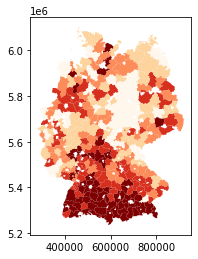

In [68]:
mapdata.plot(column='Wert', cmap='OrRd', scheme='quantiles')

In [ ]:
print(ind_export[[kategorie_indikator,'Wert']].corr())
res = ind_export[kategorie_indikator].sub(ind_export['Wert']).pow(2).sum()
tot = ind_export[kategorie_indikator].sub(ind_export[kategorie_indikator].mean()).pow(2).sum()
r2 = 1 - res/tot
print('r²',r2)

                                Erreichbarkeit von Oberzentren      Wert
Erreichbarkeit von Oberzentren                        1.000000 -0.303704
Wert                                                 -0.303704  1.000000
r² -0.27542461916229244


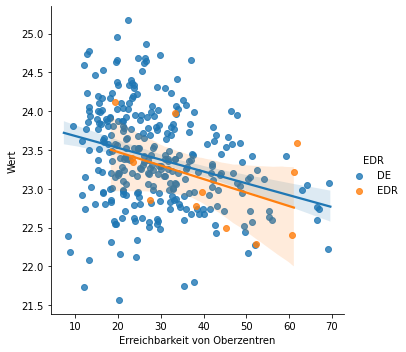

In [ ]:
sns.lmplot(data=ind_export, x=kategorie_indikator, y='Wert', order=1, hue='EDR',x_jitter=1) #x_bins=10, 

In [ ]:
pd.crosstab(ind_export['group'],ind_export['Klasse'])#,values=ind_export['Wert'], aggfunc=np.mean)

Klasse,0,1,2,3,4
group,,,,,
DE Oberzentrum,1,0,0,0,0
DE Rest,1,111,111,56,24
EDR Rest,0,1,4,3,4


In [ ]:
slice = ind[ind.Jahresnummer==2017]
pd.crosstab(slice['Indikator'],slice['group'], margins=True)

group,DE Oberzentrum,DE Rest,EDR Oberzentrum,EDR Rest,All
Indikator,,,,,
Arbeitslosenquote,85,303,2,12,402
Bruttoinlandsprodukt in 1000 Euro,85,303,2,12,402
Bruttoinlandsprodukt je Erwerbstätigen,85,303,2,12,402
Fortzugsrate,85,303,2,12,402
Restlebenserwartung der 60-Jährigen,85,303,2,12,402
SGB II - Quote,85,303,2,12,402
Schulabgänger ohne Abschluss,170,606,4,24,804
Säuglingssterblichkeit (<1 Jahr),85,303,2,12,402
Zuzugsrate,85,303,2,12,402


In [ ]:

p = sns.heatmap(data=ind[(ind.Jahresnummer>2008)&((ind.Raumbezug=='Kreise')|(ind.Raumbezug=='Gemeinden')|(ind.Raumbezug=='Gemeindeverbände'))], #(ind.Indikator==indikatoren[1])&(ind.Raumbezug=='Kreise')&
        x='Zeitbezug', y='Wert', kind="point", sharey=False,
        row="Indikator", #col="selected",
        hue='EDR', 
        markers="o", errwidth=1 , capsize=.07, ci=80)

ValueError: could not convert string to float: 'Absolutzahlen'

In [ ]:
p.savefig("ups.svg")

In [ ]:
inkar.Bereich.unique()

In [ ]:
inkar.Indikator.unique()

## Ist die EDR in bestimmen Indikatoren unterschiedlich vom Rest?

[Der gute Lovi]( https://www.youtube.com/watch?v=xk3qlX37mvA)

H1: Die Werte im EDR sind im Mittel höher oder niedriger als die Werte im Rest der Bundesrepublik.

H0: Die Werte im EDR sind im Mittel ähnlich der Werte im Rest der Bundesrepublik.

(Zweiseitiger Test, p=X.X)

Ziel: Akzeptieren der Hypothese H1.

|                                                | HO stimmt     | H1 stimmt     |
| ---------------------------------------------- | ------------- | ------------- |
| Indizien sprechen für H0 -> H0 nicht abgelehnt | OK            | Fehler 2. Art* |
| Indizien sprechen gegen H0 -> H0 abgelehnt     | Fehler 1. Art | OK            |

\* Datenlage schwach

Mit welcher Wahrscheinlichkeit (p-Wert, "Indiz") sieht man Messwerte zur Ablehnung von H0 führen? Dazu muss der p-Wert klein sein (kleiner Signifikanzniveau).